https://www.bilibili.com/video/BV1Xi421R7ev/?spm_id_from=333.337.search-card.all.click&vd_source=a0dab138978e49c265fbce6907b40d53

https://www.bilibili.com/video/BV1F1421B7iv/?spm_id_from=333.337.search-card.all.click&vd_source=a0dab138978e49c265fbce6907b40d53

https://www.youtube.com/watch?v=o29P0Kpobz0

https://www.youtube.com/watch?v=SMBkImDWOyQ

In [2]:
import torch
import math
import matplotlib.pyplot as plt

In [7]:
# Define matrices A and B
A = torch.tensor([[2.0, 0.0], [0.0, 3.0]])  # Transformation for X^1
B = torch.tensor([[1.0, 0.0], [0.0, 4.0]])  # Transformation for X^2

print("Matrix A:\n", A)
print("Matrix B:\n", B)

# Define vector X split into X^1 and X^2
X1 = torch.tensor([[1.0, 2.0]])  # Row vector for X^1
X2 = torch.tensor([[3.0, 4.0]])  # Row vector for X^2

# Block diagonal matrix
block_matrix = torch.block_diag(A, B)

# Combined input vector
X = torch.cat((X1, X2), dim=1)  # Concatenate X^1 and X^2

# Matrix multiplication
result = X @ block_matrix

print("Block diagonal matrix:")
print(block_matrix)
print("\nInput vector (X):")
print(X)
print("\nResult after multiplication:")
print(result)


Matrix A:
 tensor([[2., 0.],
        [0., 3.]])
Matrix B:
 tensor([[1., 0.],
        [0., 4.]])
Block diagonal matrix:
tensor([[2., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 4.]])

Input vector (X):
tensor([[1., 2., 3., 4.]])

Result after multiplication:
tensor([[ 2.,  6.,  3., 16.]])


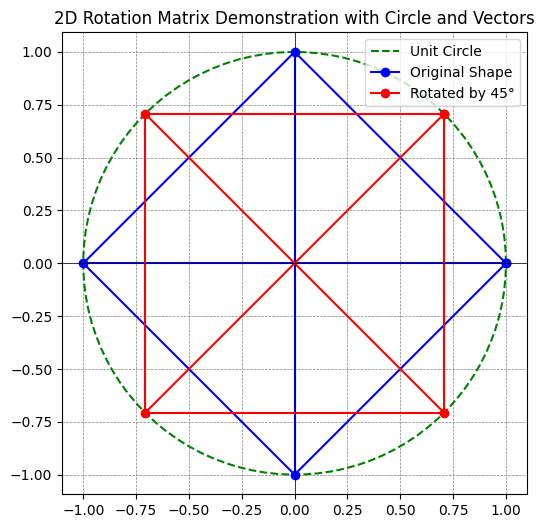

In [6]:
# rotation in 2D
# Function to create a 2D rotation matrix
def rotation_matrix(theta):
    theta = math.radians(theta)  # Convert angle to radians
    return torch.tensor([
        [math.cos(theta), -math.sin(theta)],
        [math.sin(theta), math.cos(theta)]
    ])

# Original points (e.g., a square)
points = torch.tensor([
    [1.0, 0.0],  # Point (1, 0)
    [0.0, 1.0],  # Point (0, 1)
    [-1.0, 0.0], # Point (-1, 0)
    [0.0, -1.0], # Point (0, -1)
    [1.0, 0.0]   # Repeat first point to close the shape
])

# Rotation angle (in degrees)
angle = 45  # Rotate by 45 degrees

# Get the rotation matrix
R = rotation_matrix(angle)

# Apply the rotation matrix to the points
rotated_points = points @ R.T

# Create a circle for reference
circle = torch.linspace(0, 2 * math.pi, 100)
circle_x = torch.cos(circle)
circle_y = torch.sin(circle)

# Plot original and rotated points with lines and a circle
plt.figure(figsize=(6, 6))

# Draw the reference circle
plt.plot(circle_x, circle_y, 'g--', label='Unit Circle')

# Draw original shape
plt.plot(points[:, 0], points[:, 1], 'bo-', label='Original Shape')
for point in points[:-1]:  # Exclude the repeated last point
    plt.plot([0, point[0]], [0, point[1]], 'b-')  # Line from origin to point

# Draw rotated shape
plt.plot(rotated_points[:, 0], rotated_points[:, 1], 'ro-', label=f'Rotated by {angle}°')
for point in rotated_points[:-1]:  # Exclude the repeated last point
    plt.plot([0, point[0]], [0, point[1]], 'r-')  # Line from origin to rotated point

# Add grid and styling
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title("2D Rotation Matrix Demonstration with Circle and Vectors")
plt.axis('equal')  # Ensure the plot is square
plt.show()


In [22]:
# Define two input vectors
q = torch.tensor([1.0, 2.0])  # Example vector for X_q
k = torch.tensor([3.0, 4.0])  # Example vector for X_k


# Define rotation matrix R(θ)
def rotation_matrix(theta):
    return torch.tensor([
        [torch.cos(theta), -torch.sin(theta)],
        [torch.sin(theta), torch.cos(theta)]
    ])

r1 = 1.5
r2 = 2.3
r3 = r1 - r2
theta1 = torch.tensor(r1)  # Example angle in radians
theta2 = torch.tensor(r2)

R_theta1 = rotation_matrix(theta1)
R_theta2 = rotation_matrix(theta2)

# Compute Q_i and K_j
Q_i = q @ R_theta1
K_j = k @ R_theta2

# print("Q_i:\n", Q_i)
# print("K_j:\n", K_j)

# Compute Q_i * K_j
similarity1 = torch.dot(Q_i, K_j)

print("(q @ r1) * (k @ r2):", similarity1)

theta = torch.tensor(r3) 
R_theta = rotation_matrix(theta)

Q = q @ R_theta
new_similarity = torch.dot(Q, k)
print("(q @ (r1-r2)) * k: ", new_similarity)


(q @ r1) * (k @ r2): tensor(6.2291)
(q @ (r1-r2)) * k:  tensor(6.2291)


In [35]:
# verify the syntax of slicing

a = torch.arange(0, 48)
a = a.view(2, 4, 6)
print(a)

u = a[..., :a.shape[-1] // 2]
v = a[..., a.shape[-1] // 2:]

# print(u)
# print(v)

y = torch.cat((-v, u), dim=-1)
print(y)

tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]],

        [[24, 25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34, 35],
         [36, 37, 38, 39, 40, 41],
         [42, 43, 44, 45, 46, 47]]])
tensor([[[ -3,  -4,  -5,   0,   1,   2],
         [ -9, -10, -11,   6,   7,   8],
         [-15, -16, -17,  12,  13,  14],
         [-21, -22, -23,  18,  19,  20]],

        [[-27, -28, -29,  24,  25,  26],
         [-33, -34, -35,  30,  31,  32],
         [-39, -40, -41,  36,  37,  38],
         [-45, -46, -47,  42,  43,  44]]])


In [36]:
position_ids = torch.tensor([0, 1, 2])
theta_base = torch.tensor([1, 0.5, 0.25])

thetas = position_ids.outer(theta_base)
print(thetas)

full_thetas = torch.cat((thetas, thetas), dim=-1)
print(full_thetas)

cos = torch.cos(full_thetas)
sin = torch.sin(full_thetas)

print(cos)
print(sin)

tensor([[0.0000, 0.0000, 0.0000],
        [1.0000, 0.5000, 0.2500],
        [2.0000, 1.0000, 0.5000]])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.5000, 0.2500, 1.0000, 0.5000, 0.2500],
        [2.0000, 1.0000, 0.5000, 2.0000, 1.0000, 0.5000]])
tensor([[ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.8776,  0.9689,  0.5403,  0.8776,  0.9689],
        [-0.4161,  0.5403,  0.8776, -0.4161,  0.5403,  0.8776]])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8415, 0.4794, 0.2474, 0.8415, 0.4794, 0.2474],
        [0.9093, 0.8415, 0.4794, 0.9093, 0.8415, 0.4794]])


In [3]:
a = torch.arange(0, 8, 2)
base = 10000
inv_freq = 1.0 / (base ** (torch.arange(0, 8, 2))

print(a)

tensor([0, 2, 4, 6])


In [6]:
base = 10
dim = 8  
device = 'cpu'
exponent = torch.arange(0, dim, 2, dtype=torch.float32).to(device) / dim
print(exponent)
inv_freq = 1.0 / (base ** (torch.arange(0, dim, 2, dtype=torch.int64).float().to(device) / dim))
print(inv_freq)

tensor([0.0000, 0.2500, 0.5000, 0.7500])
tensor([1.0000, 0.5623, 0.3162, 0.1778])


In [9]:
position_ids = torch.arange(0, 4)
print(position_ids)
position_ids_expanded = position_ids[:, None, :]

tensor([0, 1, 2, 3])


IndexError: too many indices for tensor of dimension 1

In [21]:
# Example dimensions
batch_size = 2  # Number of sequences in the batch
seq_len = 4     # Length of each sequence
dim = 8         # Hidden size per token

base = 10
device = 'cpu'

# Simulated input
x = torch.randn(batch_size, seq_len, dim)

# Simulated position IDs (0 to seq_len-1 for each batch)
position_ids = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)
print(position_ids)

exponent = torch.arange(0, dim, 2, dtype=torch.float32).to(device) / dim
print("exponent\n", exponent)
inv_freq = 1.0 / (base ** (torch.arange(0, dim, 2, dtype=torch.int64).float().to(device) / dim))
print("inv_freq\n", inv_freq)

inv_freq_expanded = inv_freq[None, :, None].expand(batch_size, -1, 1)
print("inv_freq_expanded\n", inv_freq_expanded)

position_ids_expanded = position_ids[:, None, :].float()
print("position_ids_expanded\n", position_ids_expanded)

freqs = (inv_freq_expanded @ position_ids_expanded).transpose(1, 2)
print("freqs\n", freqs)

emb = torch.cat((freqs, freqs), dim=-1)
print("emb\n", emb)

cos = torch.cos(emb)
sin = torch.sin(emb)

print("cos\n", cos)
print("sin\n", sin)


cos = cos.unsqueeze(1)
sin = sin.unsqueeze(1)
print("cos\n", cos)
print("sin\n", sin)



tensor([[0, 1, 2, 3],
        [0, 1, 2, 3]])
exponent
 tensor([0.0000, 0.2500, 0.5000, 0.7500])
inv_freq
 tensor([1.0000, 0.5623, 0.3162, 0.1778])
inv_freq_expanded
 tensor([[[1.0000],
         [0.5623],
         [0.3162],
         [0.1778]],

        [[1.0000],
         [0.5623],
         [0.3162],
         [0.1778]]])
position_ids_expanded
 tensor([[[0., 1., 2., 3.]],

        [[0., 1., 2., 3.]]])
freqs
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000],
         [1.0000, 0.5623, 0.3162, 0.1778],
         [2.0000, 1.1247, 0.6325, 0.3557],
         [3.0000, 1.6870, 0.9487, 0.5335]],

        [[0.0000, 0.0000, 0.0000, 0.0000],
         [1.0000, 0.5623, 0.3162, 0.1778],
         [2.0000, 1.1247, 0.6325, 0.3557],
         [3.0000, 1.6870, 0.9487, 0.5335]]])
emb
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [1.0000, 0.5623, 0.3162, 0.1778, 1.0000, 0.5623, 0.3162, 0.1778],
         [2.0000, 1.1247, 0.6325, 0.3557, 2.0000, 1.1247, 0.6325, 0.3557],
         [3.

In [24]:
position_ids = torch.arange(0, 4)
print(position_ids)
print(position_ids.shape)
position_ids = position_ids.unsqueeze(0)
print(position_ids.shape)
position_ids_expanded = position_ids[:, None, :]
print(position_ids_expanded.shape)
print(position_ids_expanded)


tensor([0, 1, 2, 3])
torch.Size([4])
torch.Size([1, 4])
torch.Size([1, 1, 4])
tensor([[[0, 1, 2, 3]]])


In [48]:
a = torch.arange(0, 4)
b = a[None, :, None]
print("a.shape:", a.shape)
print("a:\n", a)
print("b.shape:", b.shape)
print("b:\n", b)
c = b.expand(4, -1, 1)
print("c.shape:", c.shape)
print("c:\n", c)

b[0][1] = 100
print("b:\n", b)
print("c:\n", c)

a.shape: torch.Size([4])
a:
 tensor([0, 1, 2, 3])
b.shape: torch.Size([1, 4, 1])
b:
 tensor([[[0],
         [1],
         [2],
         [3]]])
c.shape: torch.Size([4, 4, 1])
c:
 tensor([[[0],
         [1],
         [2],
         [3]],

        [[0],
         [1],
         [2],
         [3]],

        [[0],
         [1],
         [2],
         [3]],

        [[0],
         [1],
         [2],
         [3]]])
b:
 tensor([[[  0],
         [100],
         [  2],
         [  3]]])
c:
 tensor([[[  0],
         [100],
         [  2],
         [  3]],

        [[  0],
         [100],
         [  2],
         [  3]],

        [[  0],
         [100],
         [  2],
         [  3]],

        [[  0],
         [100],
         [  2],
         [  3]]])
